In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import PIL.Image
from matplotlib import pyplot as plt

### Look for installed font to show Chinese characters in Matplotlib

In [2]:
!fc-list :lang=zh

/System/Library/Fonts/STHeiti Medium.ttc: Heiti SC,黑體\-簡,黒体\-簡,Heiti\-간체,黑体\-简:style=Medium,中黑,Halbfett,Normaali,Moyen,Medio,ミディアム,중간체,Médio,Средний,Normal,中等,Media
/System/Library/Fonts/PingFang.ttc: PingFang TC,蘋方\-繁,苹方\-繁:style=Regular,標準體,常规体
/System/Library/Fonts/PingFang.ttc: PingFang SC,蘋方\-簡,苹方\-简:style=Regular,標準體,常规体
/System/Library/Fonts/PingFang.ttc: PingFang HK,蘋方\-港,苹方\-港:style=Regular,標準體,常规体
/System/Library/Fonts/STHeiti Light.ttc: Heiti TC,黑體\-繁,黒体\-繁,Heiti\-번체,黑体\-繁:style=Light,細體,Mager,Fein,Ohut,Fin,Leggero,ライト,가는체,Licht,Tynn,Leve,Светлый,细体,Fina
/System/Library/Fonts/Supplemental/Songti.ttc: Songti SC,宋體\-簡,宋体\-简:style=Light,細體,细体
/System/Library/Fonts/Supplemental/Songti.ttc: Songti TC,宋體\-繁,宋体\-繁:style=Regular,標準體,常规体
/System/Library/Fonts/Supplemental/Songti.ttc: Songti SC,宋體\-簡,宋体\-简:style=Regular,標準體,常规体
/System/Library/Fonts/PingFang.ttc: .PingFang SC,.蘋方\-簡,.苹方\-简:style=Medium,中黑體,中黑体
/System/Library/Fonts/PingFang.ttc: .PingFang HK,.蘋方\-港,.苹方\-港:style=Medium

In [3]:
from matplotlib.font_manager import FontProperties
# plt.rcParams['font.family'] = ['STKaiti'] 
plt.rcParams['font.family'] = ['Heiti TC'] 
plt.rcParams['axes.unicode_minus'] = False  # in case minus sign is shown as box

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  
from tensorflow.keras.optimizers import Adam

In [5]:
raw_data_path = '/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_characters_cleaned'
training_data_path = '/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_training_data/'
testing_data_path = '/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_testing_data/'

os.chdir(raw_data_path)
print( 'Current working directory:', os.getcwd() ) 

Current working directory: /Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_characters_cleaned


In [6]:
selected_chars = [ '學', '無', '止', '境' ]

In [7]:
os.chdir(raw_data_path)
try: 
    os.mkdir(training_data_path) 

except:
    shutil.rmtree(training_data_path)
    os.mkdir(training_data_path) 

finally: 
    for char in selected_chars:
        shutil.copytree(raw_data_path+'/'+char, training_data_path+'/'+char )

In [8]:
os.getcwd()

'/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_characters_cleaned'

### Let's visualize a sample data

In [9]:
img_list = []
for char in selected_chars : 
    folder_path = training_data_path+'/'+char
    file_names = os.listdir(folder_path)
    for i in range(7):
        img_list.append(folder_path+'/'+file_names[i])

In [10]:
img_list[:3]

['/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_training_data//學/學_8.png',
 '/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_training_data//學/學_22.png',
 '/Users/derryzrli/Downloads/data_dsi_capstone/traditional_chinese_training_data//學/學_36.png']

### Sample Data

2022-06-09 16:31:11.701329: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


{'無', '境', '止', '學'}


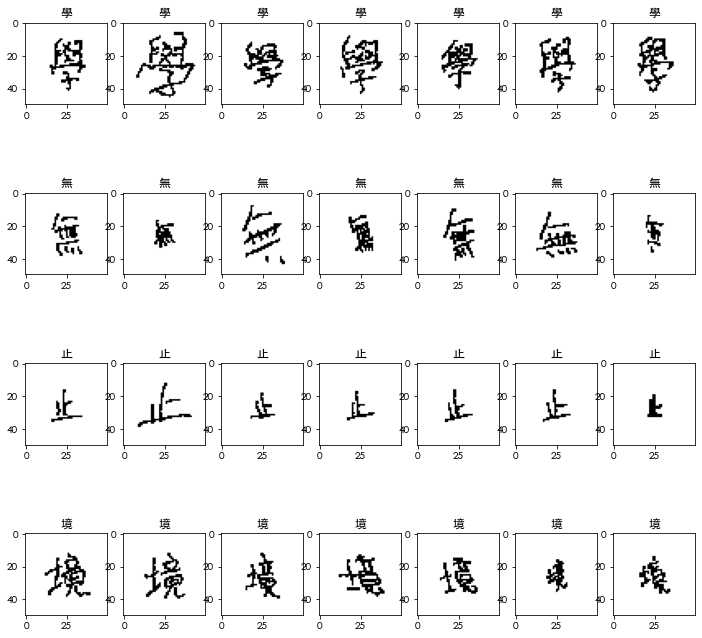

In [11]:
l = []
for i in range(28):      
    plt.subplot(4,7,i+1)
    title = img_list[i].split('/')[-1].split('_')[0]
    
    plt.gcf().set_size_inches((12,12)) 
    img = load_img(img_list[i])  
    img = tf.constant(np.array(img))
    plt.imshow(img)
    plt.title(title)
    l.append(title)
print(set(l))

----

### Data Augmentation

#### Training Set

In [73]:
train_data_gen = ImageDataGenerator(rescale = 1./255, 
                                    validation_split = 0.2,
                                    width_shift_range = 0.05,   
                                    height_shift_range = 0.05,
                                    zoom_range = 0.1)

In [74]:
train_gen = train_data_gen.flow_from_directory(training_data_path,
                                               target_size = (50,50),
                                               batch_size = 8,
                                               class_mode = 'categorical',
                                               subset = 'training'
                                              )

Found 163 images belonging to 4 classes.


#### Testing Set

In [75]:
test_data_gen = ImageDataGenerator(rescale = 1./255, 
                                    validation_split = 0.2)

In [76]:
test_gen = test_data_gen.flow_from_directory(training_data_path,
                                             target_size = (50,50),
                                             batch_size = 8,
                                             class_mode = 'categorical',
                                             subset = 'validation')

Found 40 images belonging to 4 classes.


In [77]:
test_gen[0][0].shape

(8, 50, 50, 3)

In [78]:
model = Sequential() 
model.add(
    Conv2D(filters=5, 
           kernel_size=(2,2), 
           activation='relu', 
           padding='same',
           input_shape=(50,50,3),
          )
)

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(
     Conv2D(filters=5, 
            kernel_size=(2,2), 
            activation='relu', 
            padding='same',
           )
)

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(rate=0.5))

model.add(Dense(512, activation='relu'))

model.add(Dense(len(selected_chars), activation='softmax'))


In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 5)         65        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 5)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 5)         105       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 720)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [80]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [81]:
history = model.fit(train_gen, validation_data=test_gen, epochs=50)

Epoch 1/50
21/21 [==============================] - 1s 18ms/step - loss: 1.4664 - accuracy: 0.3057 - val_loss: 1.2585 - val_accuracy: 0.2500
Epoch 2/50
21/21 [==============================] - 0s 9ms/step - loss: 1.2175 - accuracy: 0.4059 - val_loss: 1.0359 - val_accuracy: 0.5250
Epoch 3/50
21/21 [==============================] - 0s 9ms/step - loss: 1.0207 - accuracy: 0.5710 - val_loss: 0.8183 - val_accuracy: 0.7000
Epoch 4/50
21/21 [==============================] - 0s 8ms/step - loss: 0.8526 - accuracy: 0.6522 - val_loss: 0.6472 - val_accuracy: 0.7750
Epoch 5/50
21/21 [==============================] - 0s 8ms/step - loss: 0.7330 - accuracy: 0.7086 - val_loss: 0.5452 - val_accuracy: 0.8250
Epoch 6/50
21/21 [==============================] - 0s 9ms/step - loss: 0.6101 - accuracy: 0.7885 - val_loss: 0.4831 - val_accuracy: 0.8000
Epoch 7/50
21/21 [==============================] - 0s 8ms/step - loss: 0.5122 - accuracy: 0.7871 - val_loss: 0.4746 - val_accuracy: 0.7750
Epoch 8/50
21/21 [=

In [82]:
os.chdir(training_data_path)
model.save('CNN_model_xwzj.h5')

In [22]:
import coremltools as ct
coreml_model = ct.convert(model, inputs=[ct.ImageType(scale=1./255)])
os.chdir(training_data_path)
coreml_model.save('my_model.mlmodel')

2022-06-09 16:31:23.349657: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-06-09 16:31:23.350859: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-06-09 16:31:23.355101: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:928] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.002ms.
  function_optimizer: function_optimizer did nothing. time = 0.002ms.

2022-06-09 16:31:23.378007: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-06-09 16:31:23.378241: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-06-09 16:31:23.396712: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:928]

In [83]:
model

In [84]:
test_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [85]:
test_gen.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [86]:
test_gen.class_indices

{'境': 0, '學': 1, '止': 2, '無': 3}

In [87]:
train_gen.class_indices

{'境': 0, '學': 1, '止': 2, '無': 3}

In [88]:
type(train_gen)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [89]:
train_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [90]:
preds = model.predict(test_gen)

In [91]:
model.predict_classes(test_gen)

/Users/derryzrli/opt/anaconda3/envs/tfm1/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 1, 1, 0, 1, 3, 2, 2, 1, 3, 1, 2, 3, 0, 1, 3, 0, 1, 2, 1, 0, 0,
       0, 1, 0, 2, 2, 2, 1, 2, 3, 1, 0, 0, 1, 0, 1, 3, 3, 2])

In [92]:
preds.round(1)

array([[0.9, 0. , 0. , 0.1],
       [0.9, 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0.9, 0. , 0.1],
       [0. , 0. , 1. , 0. ],
       [1. , 0. , 0. , 0. ],
       [0.1, 0.1, 0. , 0.8],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. ],
       [0.9, 0.1, 0. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0.1, 0. , 0.9],
       [0. , 0. , 0.9, 0.1],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0. , 1. , 0. , 0. ],
       [1. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0.1, 0.8, 0. , 0. ],
       [0.4, 0.3, 0. , 0.3],
       [0. , 1. , 0. , 0. ],
       [0.7, 0.1, 0. , 0.2],
       [0.7, 0.2, 0. , 0.1],
       [0.8, 0.1, 0. , 0.1],
       [0. , 0.4, 0. , 0.6],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0.1, 0. , 0.9],
       [0. , 1. , 0. , 0. ],
       [1. , 0. , 0. , 0. ],
       [0. , 0. , 0.9, 0.1],
       [0. , 0.1, 0. , 0.9],
       [0. , 0